# Titanic Predations

In [3]:
import pandas as pd

df = pd.read_csv(r"./train.csv")
test_df = pd.read_csv(r"./test.csv")


## Visualization

In [5]:
df_viz = df.copy()

In [6]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_viz.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set_palette("deep")

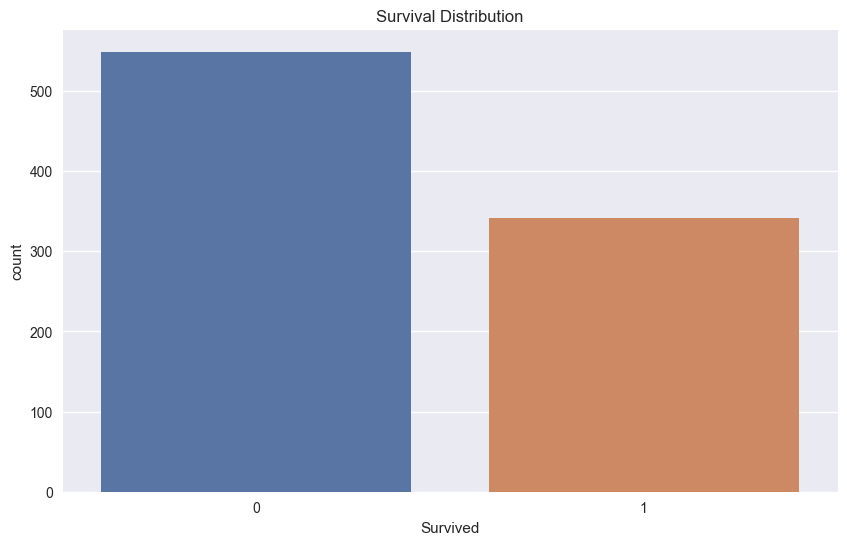

In [255]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df_viz)
plt.title('Survival Distribution')
plt.show()

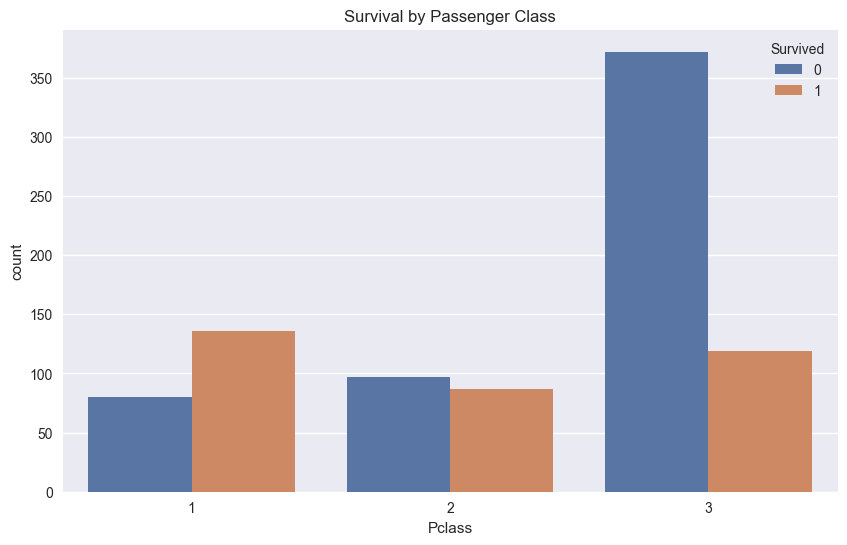

In [256]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

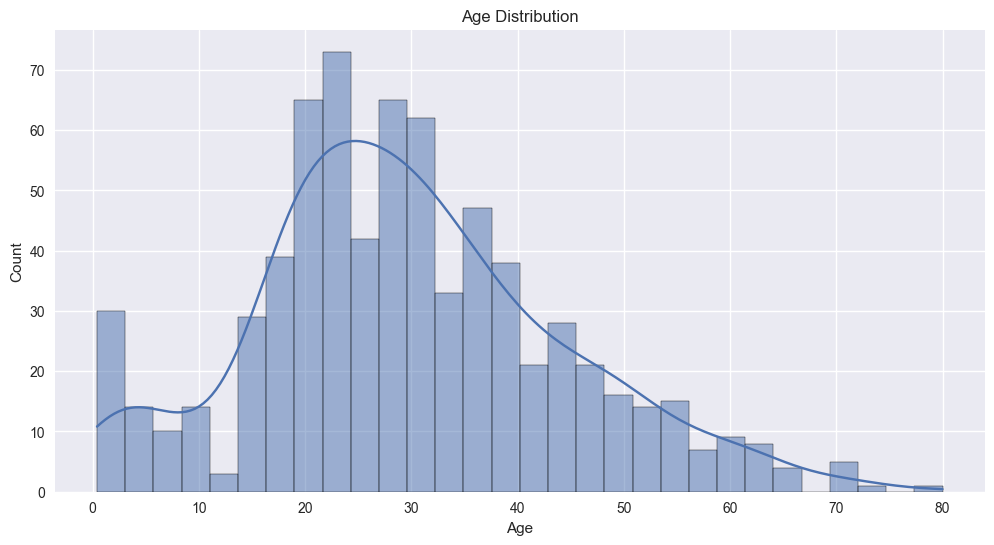

In [257]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

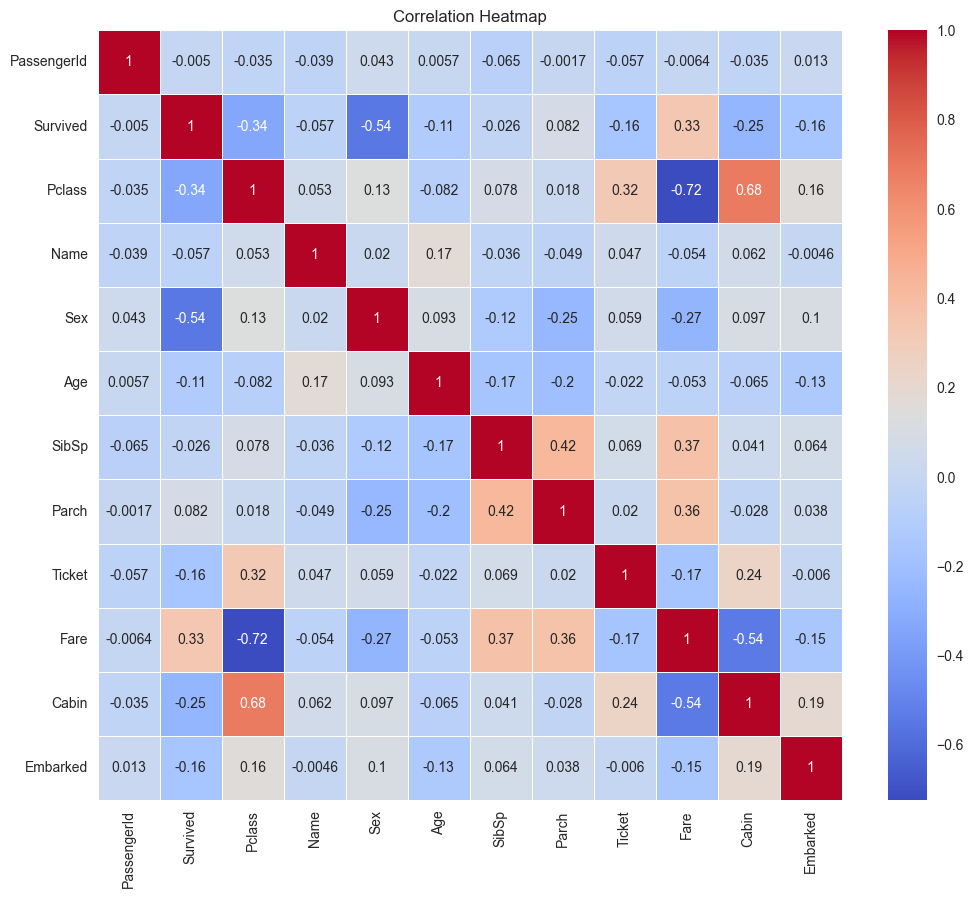

In [258]:
from sklearn.preprocessing import LabelEncoder
plt.figure(figsize=(12, 10))
sns.heatmap(df_viz.apply(LabelEncoder().fit_transform).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1200x600 with 0 Axes>

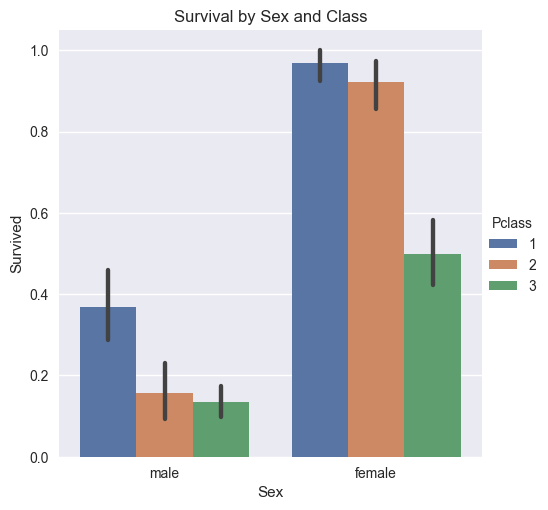

In [259]:
plt.figure(figsize=(12, 6))
sns.catplot(x='Sex', y='Survived', hue='Pclass', kind='bar', data=df)
plt.title('Survival by Sex and Class')
plt.show()

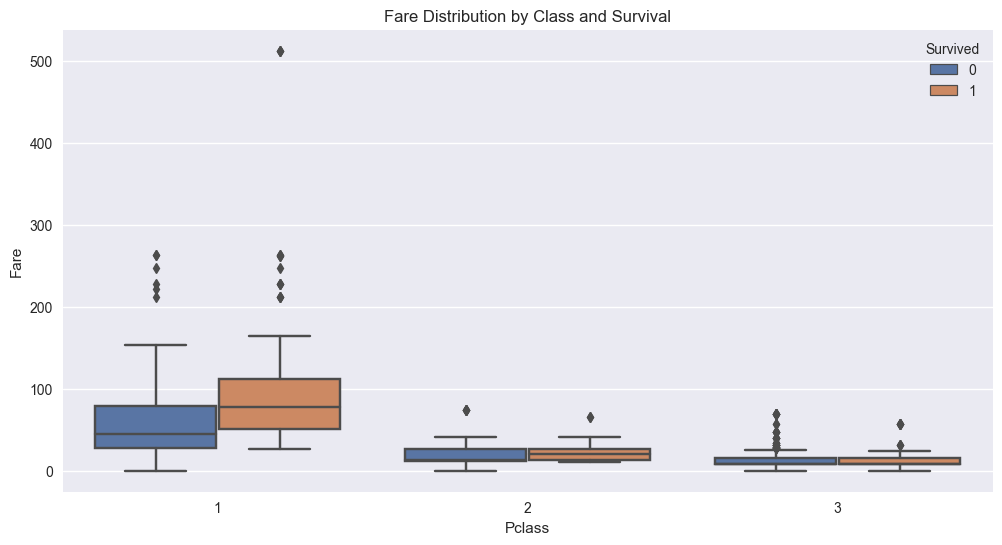

In [260]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare Distribution by Class and Survival')
plt.show()

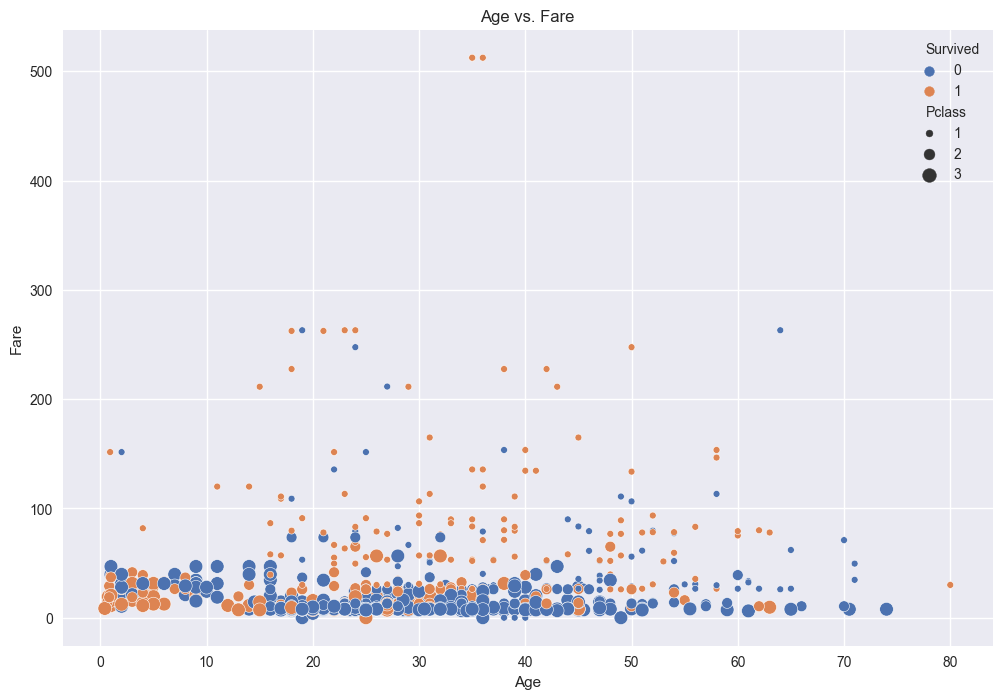

In [261]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Fare', hue='Survived', size='Pclass', data=df)
plt.title('Age vs. Fare')
plt.show()

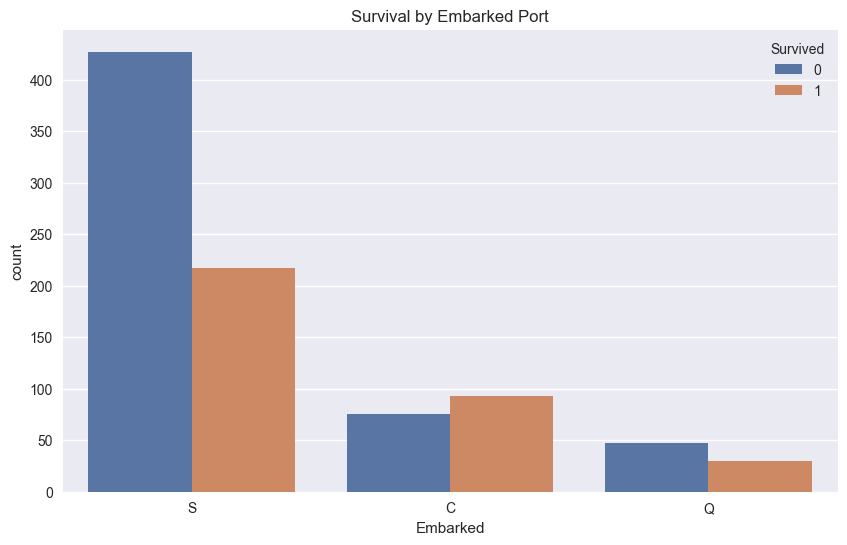

In [262]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked Port')
plt.show()

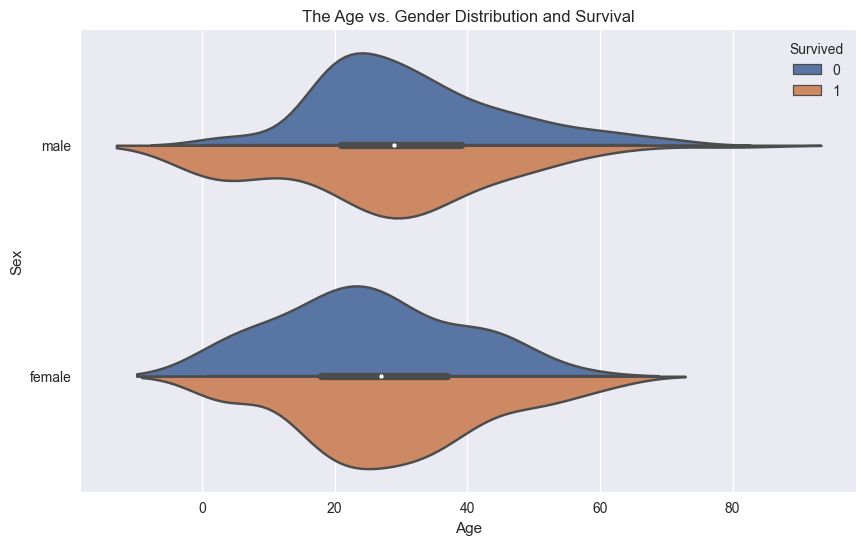

In [263]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Age", y="Sex", hue="Survived", data=df_viz, split=True)
plt.title('The Age vs. Gender Distribution and Survival')
plt.show()

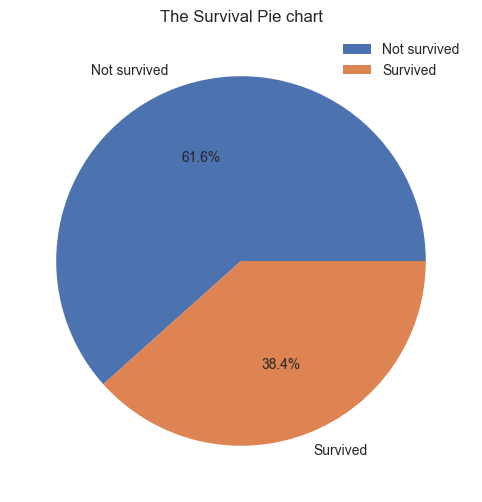

In [264]:
plt.figure(figsize=(10, 6))
plt.pie(df['Survived'].value_counts(), labels=['Not survived', 'Survived'], autopct='%1.1f%%')
plt.title('The Survival Pie chart')
plt.legend()
plt.show()

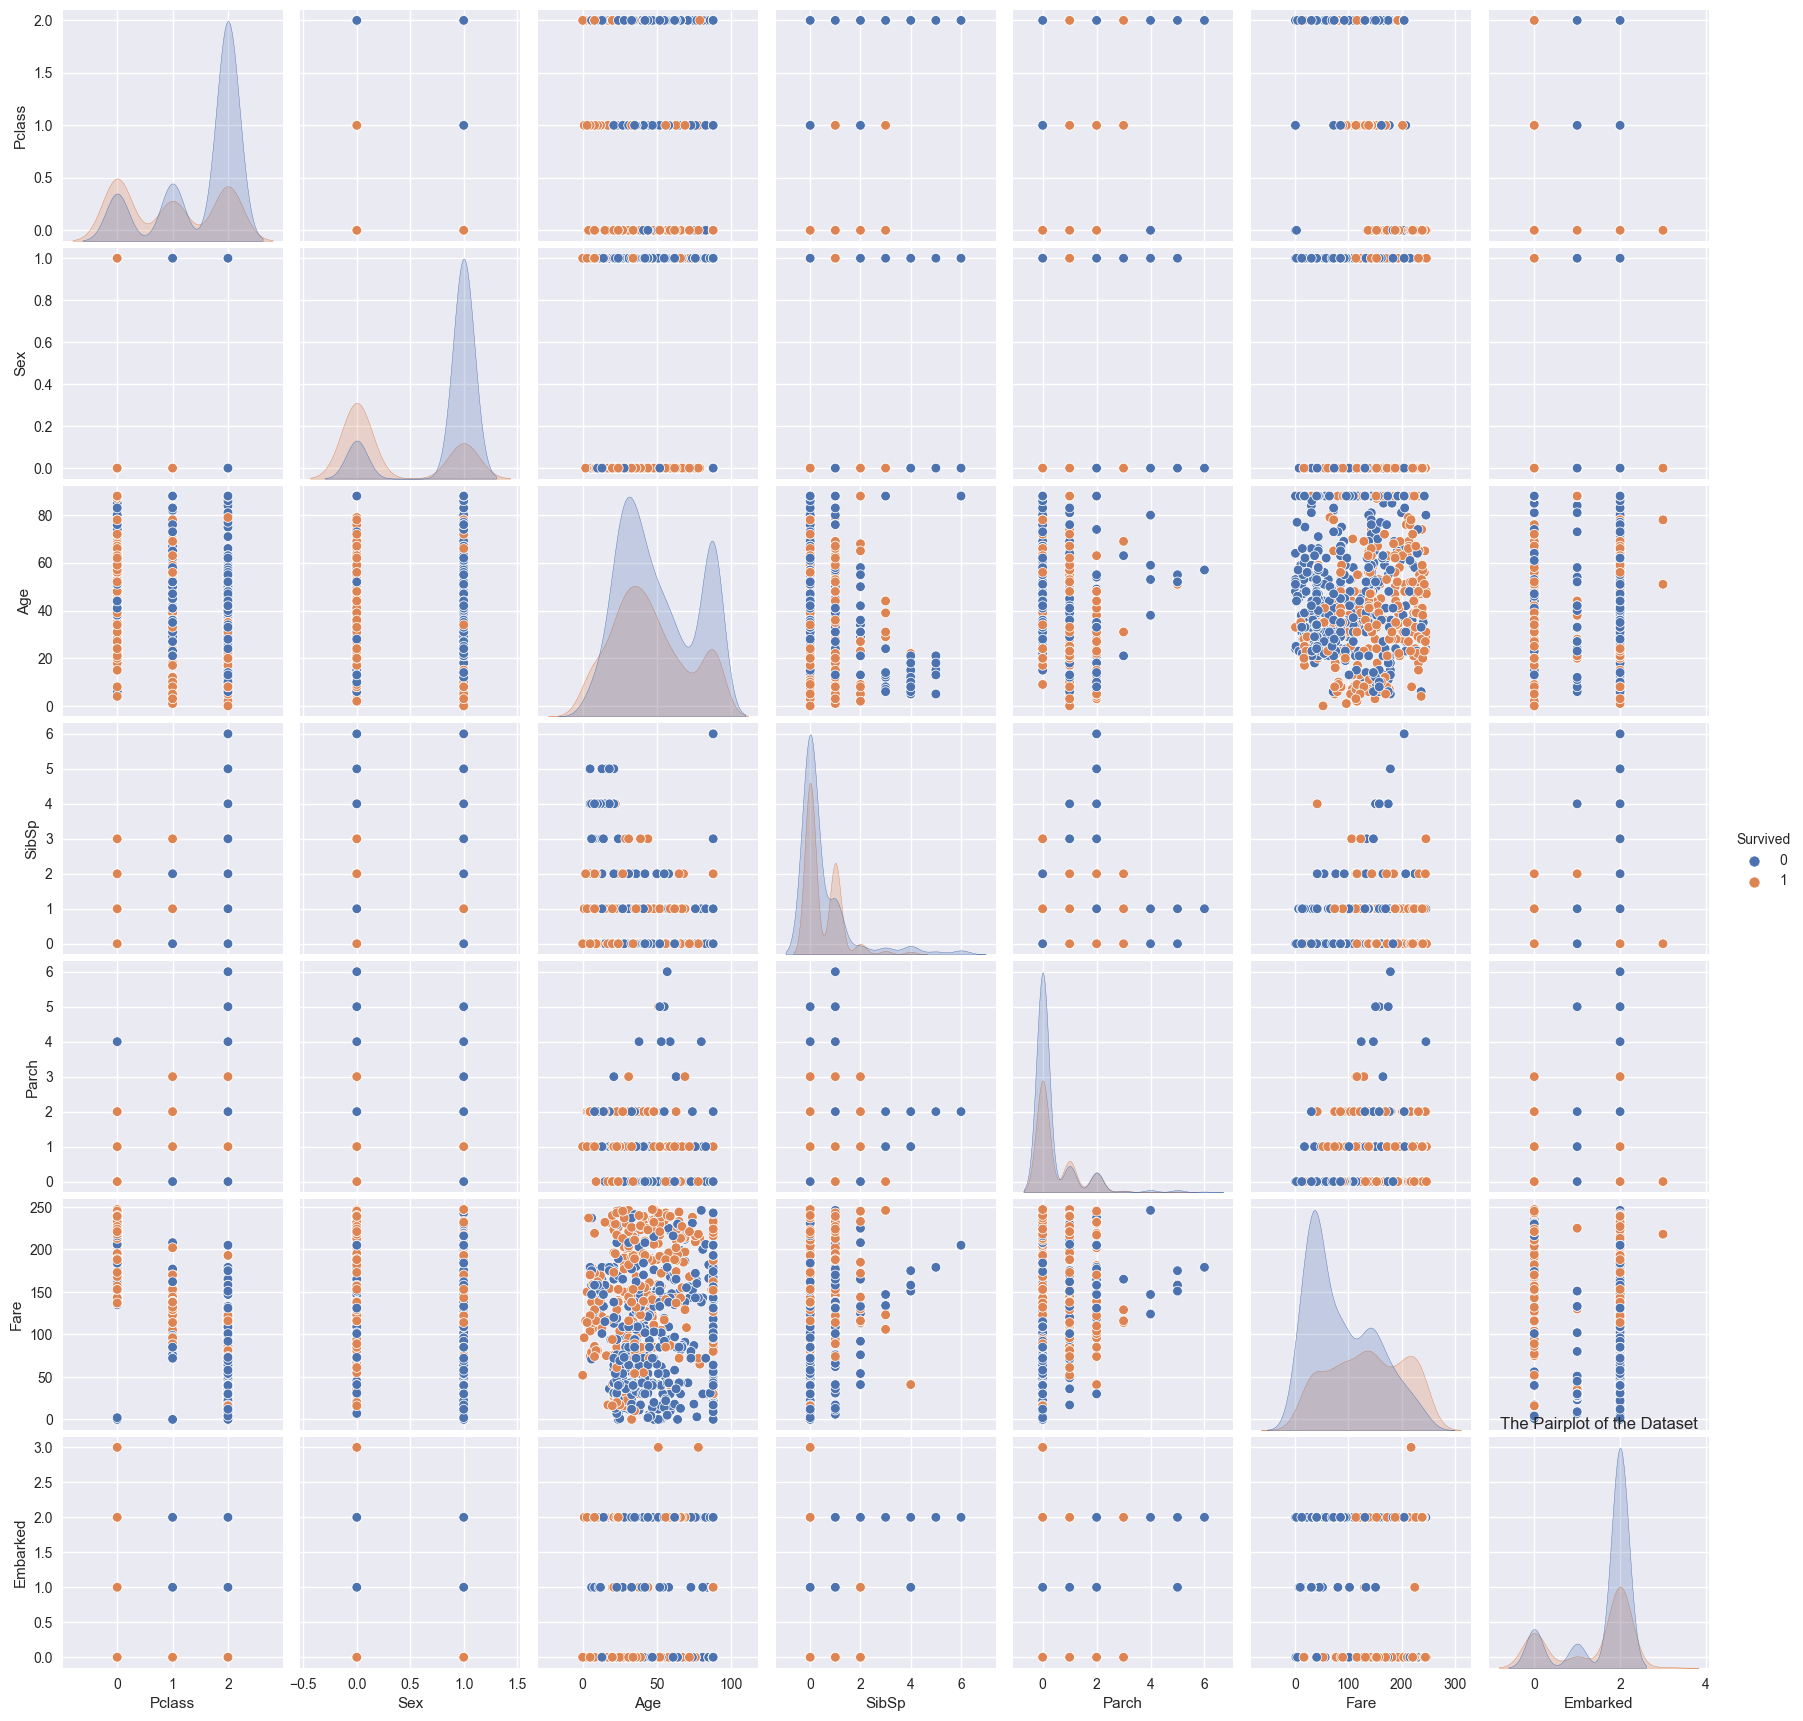

In [265]:
df_viz = df_viz.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_viz = df_viz.apply(LabelEncoder().fit_transform)
sns.pairplot(data=df_viz,hue="Survived")
plt.title("The Pairplot of the Dataset")
plt.show()

## Data Pipeline

In [267]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


class ImputeAge(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        imputer = SimpleImputer(strategy='median')
        X['Age'] = imputer.fit_transform(X[['Age']])
        X['Fare'] = imputer.fit_transform(X[['Fare']])
        return X

# Example of how to drop columns, already defined
class DropColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.drop(labels=['Name', 'Ticket', 'Cabin', 'PassengerId'], axis='columns')


# Example of how to encode categorical columns, already defined
class EncodeCategorical(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Encode 'Sex' column
        X['Male'] = (X['Sex'] == 'male').astype(int)
        X.drop(labels=['Sex'], axis='columns', inplace=True)
        
        # Encode 'Embarked' column
        for col in ['C', 'S', 'Q']:
            X[col] = (X['Embarked'] == col).astype(int)
        X.drop(labels=['Embarked'], axis='columns', inplace=True)
        
        # for idx,person_class in enumerate(['1st Class','2nd Class','3rd class']):
        #     X[person_class] = (X['Pclass'] == idx).astype(int)
        # X.drop(labels=['Pclass'], axis='columns', inplace=True)
        
        return X

from sklearn.preprocessing import StandardScaler
# Creating the pipeline
pipeline = Pipeline([
    ('drop_columns', DropColumns()),
    ('encode_categorical', EncodeCategorical()),  # Encode first before using features in imputation
    ('impute_age', ImputeAge()),
])

In [268]:
x_data = pipeline.fit_transform(df)
y_data = df['Survived']
test_data = pipeline.fit_transform(test_df)

In [269]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Male      891 non-null    int32  
 7   C         891 non-null    int32  
 8   S         891 non-null    int32  
 9   Q         891 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 55.8 KB


In [270]:
x_data = x_data.drop(labels=['Survived'], axis='columns')

## Model Selection & Training

Cross validation + Voting classifier + Grid search Combination

In [271]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate,GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
x_data = StandardScaler().fit_transform(x_data)
x_test = StandardScaler().fit_transform(test_data)


In [290]:
params_lgm = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'is_unbalance': True,  # or use scale_pos_weight
    'reg_alpha': 0.5,
    'reg_lambda': 0.5,
    'num_leaves': 31,
    'verbosity':-1,
    'max_depth': -1,    
    'min_data_in_leaf': 10,
    'force_row_wise': True,
    'n_estimators': 300,
    'learning_rate': 0.5
}
# prams for LGBM classifier

In [288]:

voting_model = VotingClassifier([
    ('xgb', XGBClassifier(n_estimators=500)),
    ('rfc', RandomForestClassifier(n_estimators=300)),
    ('ada', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),n_estimators=200)),
    ('gbc', GradientBoostingClassifier(n_estimators=200)),
    ('logreg', LogisticRegression(penalty='l2', C=0.001)),
    ('svm', SVC(probability=True,kernel='rbf')),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('lgm', LGBMClassifier(**params_lgm)),
    # ('naive_bayes', GaussianNB())
],voting='soft')

param_grid = {
    # Regularization strength
     # L2 regularization
    # 'gbc__n_estimators': [200, 350,500],
    # 'ada__n_estimators': [200, 350],
    # 'rfc__n_estimators': [200, 350],
    # 'gbc__n_estimators': [200, 350],
}
# using the grid search found the good prams it time consuming
fold = StratifiedKFold(n_splits=10)
grid_search = GridSearchCV(voting_model, param_grid, cv=fold, scoring='accuracy')
grid_search.fit(x_data, y_data)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=VotingClassifier(estimators=[('xgb',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   ga...
                                                    ('logreg',
                                                     LogisticRegression(C=0.001)),
                                                    ('svm',
                                                     SVC(probability=True)),
                                                    ('knn',
                                                     KNeighborsClassifier(n_neighbors=3)),
                                                    ('lgm',
                                                     LGBMClassifier(force_row_wise=True,
                                                                    is_unbalance=True,
                                                                    learning_rate=0.4,
                                                                    metric='auc',
                                                                    min_data_in_leaf=10,
                                                                    n_estimators=350,
                                                                    objective='binary',
                                                                    reg_alpha=0.5,
                                                                    reg_lambda=0.5,
                                                                    verbosity=-1))],
                                        voting='soft'),
             param_grid={}, scoring='accuracy')

In [289]:
from sklearn.metrics import classification_report


print("Best parameters:", grid_search.best_params_)
print(classification_report(y_data, grid_search.predict(x_data)))

Best parameters: {}
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       549
           1       0.98      0.90      0.94       342

    accuracy                           0.95       891
   macro avg       0.96      0.94      0.95       891
weighted avg       0.96      0.95      0.95       891



In [283]:
best_model = grid_search.best_estimator_
r = best_model.predict(x_test)

In [284]:
data_test = pd.read_csv(r"C:\Users\vetri\OneDrive\Desktop\ML roadmap\data\Titanic data\test.csv")

In [285]:
df_f = pd.DataFrame({
    'PassengerId': data_test['PassengerId'],
    'Survived': r
})

In [ ]:
df_f.to_csv("submission.csv",index=False)

77-78% accuracy on kaggle Submission